Exploratory data analysis for weather data from the year 2016 to 2019.
**Note that the data is recorded with an interval of 15 minutes on each day 

In [13]:
#installation
# %pip install numpy matplotlib pandas seaborn
#import the libraries 
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [14]:
#import the csv file 
weather_df= pd.read_csv(r"ADD FILE HERE")
#display first 5 entries
weather_df.head()

,Date,UT time,Temperature (K),Relative Humidity (%),Pressure (hPa),Wind speed (m/s),Wind direction,Rainfall (kg/m2),Short-wave irradiation (Wh/m2)
0,01-07-2016,00:00,299.50,88.12,991.03,6.04,253.53,0.123595,0.0000
1,01-07-2016,00:15,299.47,87.99,991.03,6.04,253.53,0.123595,0.0000
2,01-07-2016,00:30,299.46,87.89,991.11,6.11,253.78,0.129541,0.0000
3,01-07-2016,00:45,299.49,87.74,991.23,6.19,253.91,0.133325,0.1806
4,01-07-2016,01:00,299.54,87.56,991.38,6.28,253.93,0.134949,4.2518


Remove the unnecessary features from the data frame

In [15]:
#removing pressure(hPa) and  Short-wave irradiation 
weather_df=weather_df.drop(columns={"Pressure (hPa)","Short-wave irradiation (Wh/m2)"})
weather_df.head()

,Date,UT time,Temperature (K),Relative Humidity (%),Wind speed (m/s),Wind direction,Rainfall (kg/m2)
0,01-07-2016,00:00,299.50,88.12,6.04,253.53,0.123595
1,01-07-2016,00:15,299.47,87.99,6.04,253.53,0.123595
2,01-07-2016,00:30,299.46,87.89,6.11,253.78,0.129541
3,01-07-2016,00:45,299.49,87.74,6.19,253.91,0.133325
4,01-07-2016,01:00,299.54,87.56,6.28,253.93,0.134949


In [16]:
weather_df.isnull().sum()#checking for null values

Date                     0
UT time                  0
Temperature (K)          0
Relative Humidity (%)    0
Wind speed (m/s)         0
Wind direction           0
Rainfall (kg/m2)         0
dtype: int64

In [17]:
weather_df.shape[0]#total number of entries 

108096

In [18]:
#renaming the columns
weather_df=weather_df.rename(columns={"Date":"date","UT time":"time","Temperature (K)":"temperature","Relative Humidity (%)":"humidity","Wind speed (m/s)":"wind speed","Wind direction":"wind direction","Rainfall (kg/m2)":"rainfall"})
weather_df.head()

,date,time,temperature,humidity,wind speed,wind direction,rainfall
0,01-07-2016,00:00,299.50,88.12,6.04,253.53,0.123595
1,01-07-2016,00:15,299.47,87.99,6.04,253.53,0.123595
2,01-07-2016,00:30,299.46,87.89,6.11,253.78,0.129541
3,01-07-2016,00:45,299.49,87.74,6.19,253.91,0.133325
4,01-07-2016,01:00,299.54,87.56,6.28,253.93,0.134949


Convert the temperature form kelvin to degree celsius

In [19]:
weather_df["temperature"]=weather_df["temperature"]-273.15
weather_df.head()

,date,time,temperature,humidity,wind speed,wind direction,rainfall
0,01-07-2016,00:00,26.35,88.12,6.04,253.53,0.123595
1,01-07-2016,00:15,26.32,87.99,6.04,253.53,0.123595
2,01-07-2016,00:30,26.31,87.89,6.11,253.78,0.129541
3,01-07-2016,00:45,26.34,87.74,6.19,253.91,0.133325
4,01-07-2016,01:00,26.39,87.56,6.28,253.93,0.134949


Lets take the average of each feature for each month from 2016 to 2019

In [20]:
# convert the dates to datetime format
weather_df["date"]=pd.to_datetime(weather_df["date"],format='%d-%m-%Y')
weather_df.head()

,date,time,temperature,humidity,wind speed,wind direction,rainfall
0,2016-07-01,00:00,26.35,88.12,6.04,253.53,0.123595
1,2016-07-01,00:15,26.32,87.99,6.04,253.53,0.123595
2,2016-07-01,00:30,26.31,87.89,6.11,253.78,0.129541
3,2016-07-01,00:45,26.34,87.74,6.19,253.91,0.133325
4,2016-07-01,01:00,26.39,87.56,6.28,253.93,0.134949


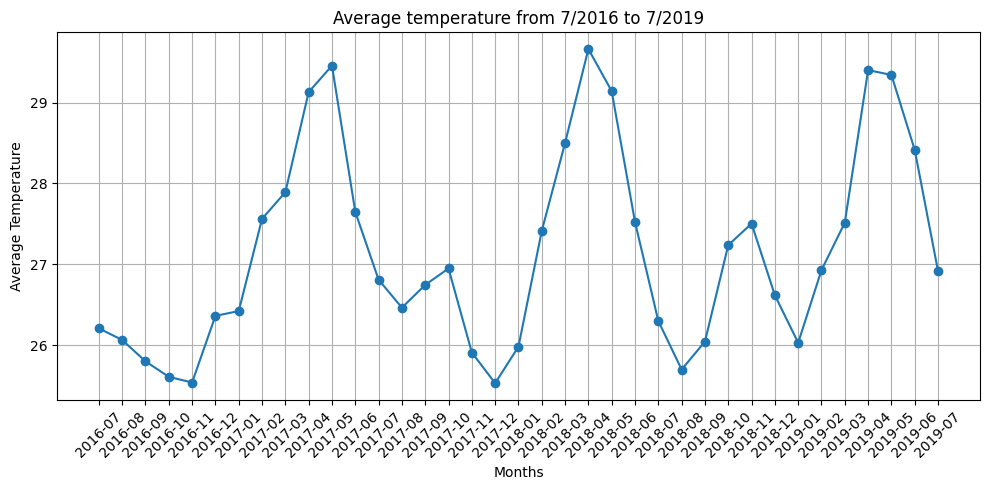

In [21]:
weather_df["month"]=weather_df["date"].dt.to_period("M")
monthly_avg_temp=weather_df.groupby("month")["temperature"].mean()

#plotting graph
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_avg_temp.index.astype(str), monthly_avg_temp.values,marker='o')
plt.xlabel("Months")
plt.ylabel("Average Temperature")
plt.title("Average temperature from 7/2016 to 7/2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


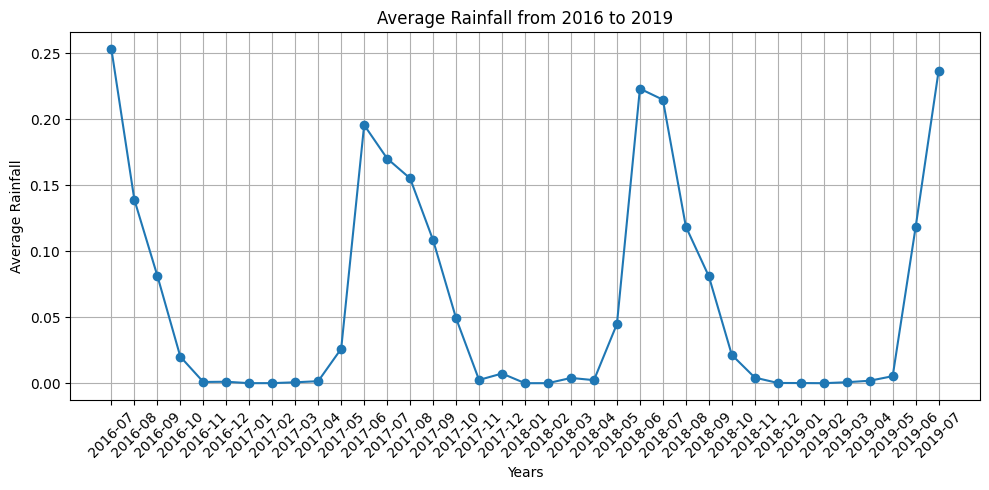

In [22]:
weather_df["month"]=weather_df["date"].dt.to_period("M")
monthly_avg_rainfall=weather_df.groupby("month")["rainfall"].mean()

#plotting graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_rainfall.index.astype(str), monthly_avg_rainfall.values, marker='o')
plt.xlabel("Years")
plt.ylabel("Average Rainfall")
plt.title("Average Rainfall from 2016 to 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

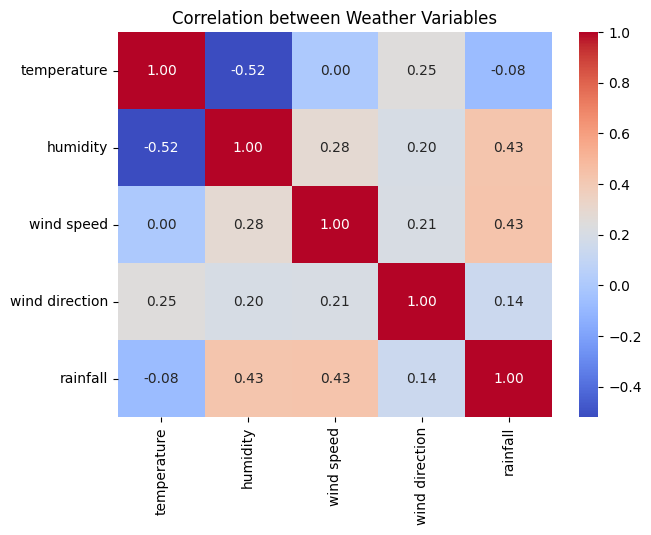

In [23]:
# Correlation heatmap
numeric_df = weather_df.select_dtypes(include=[np.number])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weather Variables')
plt.show()


From the correlation heatmap we can see the correlation between the different veraibles

-there is a large negative corretation between temperature and humidity

-humidity and rainfall and humidity and wind speed have a moderately positive correlation

-temperature and wind direction have a slight positive correlation

-there is a slight positive correlation between the year and temperature (meaning that over the years temperatures may increase)


In [24]:
#removing the month column 
weather_df=weather_df.drop(columns={"month"})
weather_df.head()
#saving the modification made to the data set as a new csv file 
weather_df.to_csv("ENTER FILE NAME")